Loading audio file: D:/MTech-BigDataSets/UrbanSound8K/UrbanSound8K/audio/mini\4201-3-0-0.wav
Audio loaded with sample rate: 44100 Hz
Applying Hann window...


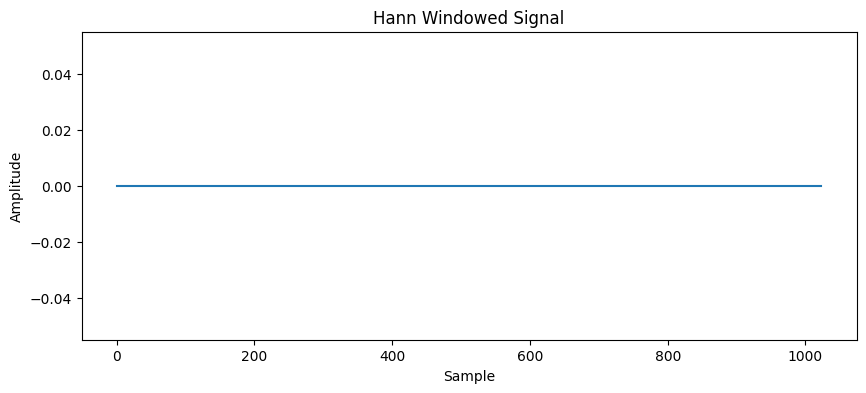

Generating spectrogram with hann window...


C:\Users\dell\AppData\Local\Temp\ipykernel_9876\2013654521.py:70: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram))


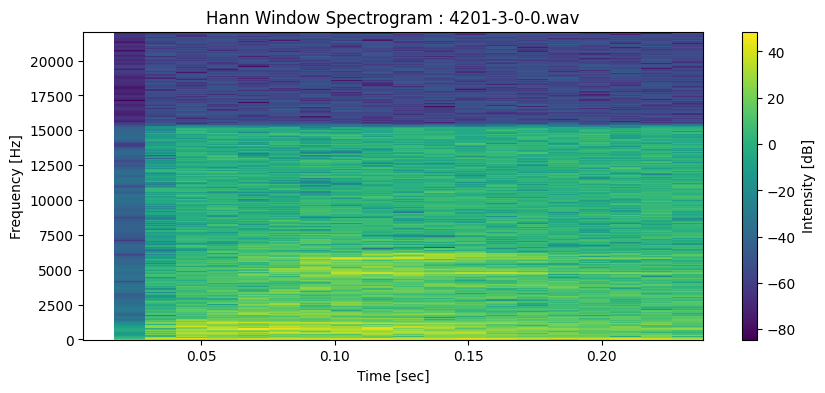

Applying Hamming window...


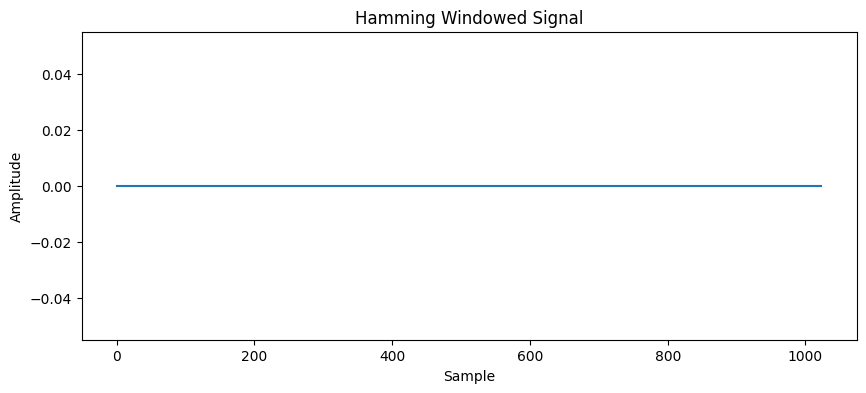

Generating spectrogram with hamming window...


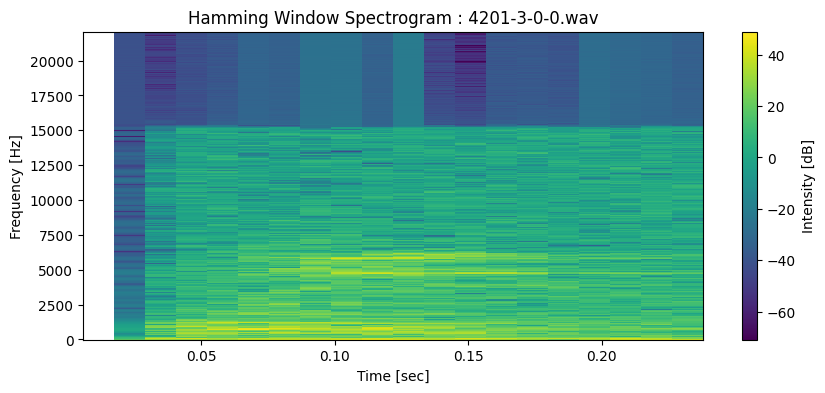

Applying Rectangular window...


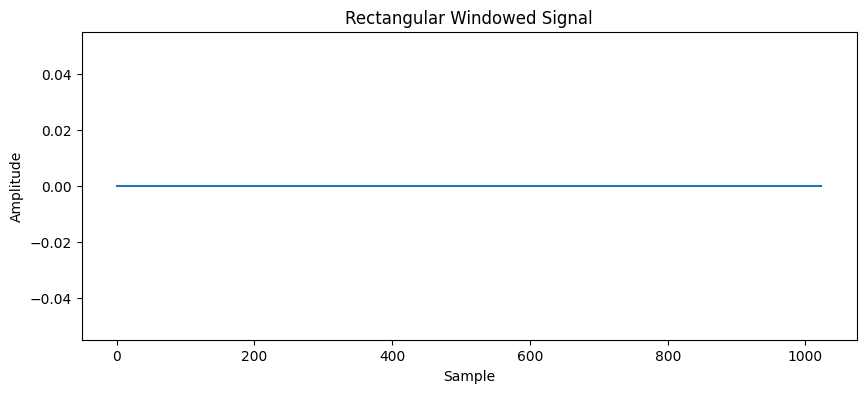

Generating spectrogram with rectangular window...


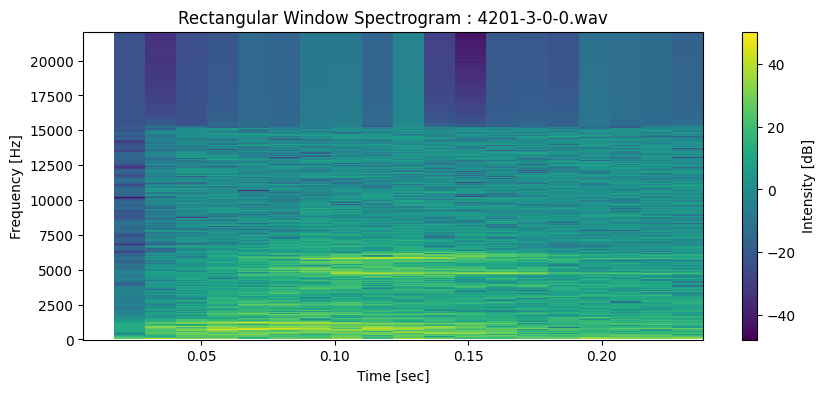

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import os


def load_audio(file_path):
    """Load audio file and return sample rate and data"""
    print(f"Loading audio file: {file_path}")
    sample_rate, audio_data = wavfile.read(file_path)
    # Convert to mono if stereo
    if len(audio_data.shape) > 1:
        audio_data = audio_data[:, 0]
    return sample_rate, audio_data


def apply_hann_window(audio_data, window_size=1024):
    """Apply Hann window to audio data"""
    print("Applying Hann window...")
    window = np.hanning(window_size)
    return window * audio_data[:window_size]


def apply_hamming_window(audio_data, window_size=1024):
    """Apply Hamming window to audio data"""
    print("Applying Hamming window...")
    window = np.hamming(window_size)
    return window * audio_data[:window_size]


def apply_rectangular_window(audio_data, window_size=1024):
    """Apply Rectangular window to audio data"""
    print("Applying Rectangular window...")
    window = np.ones(window_size)
    return window * audio_data[:window_size]


def generate_spectrogram(audio_data, sample_rate, window_type='hann'):
    """Generate spectrogram using STFT"""
    print(f"Generating spectrogram with {window_type} window...")
    if window_type == 'hann':
        window = np.hanning(1024)
    elif window_type == 'hamming':
        window = np.hamming(1024)
    else:  # rectangular
        window = np.ones(1024)

    frequencies, times, spectrogram = signal.spectrogram(audio_data,
                                                         fs=sample_rate,
                                                         window=window,
                                                         nperseg=1024,
                                                         noverlap=512)
    return frequencies, times, spectrogram


def plot_windowed_signal(signal_data, title):
    """Plot a windowed signal"""
    plt.figure(figsize=(10, 4))
    plt.plot(signal_data)
    plt.title(title)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()


def plot_spectrogram(frequencies, times, spectrogram, title):
    """Plot a spectrogram"""
    plt.figure(figsize=(10, 4))
    plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram))
    plt.title(title)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Intensity [dB]')
    plt.show()


def main():
    # Replace this path with your actual dataset path
    dataset_path = "D:/MTech-BigDataSets/UrbanSound8K/UrbanSound8K/audio/mini"

    # Process first audio file in the dataset
    for audio_file in os.listdir(dataset_path):
        if audio_file.endswith('.wav'):
            audio_path = os.path.join(dataset_path, audio_file)

            # Step 1: Load audio file
            sample_rate, audio_data = load_audio(audio_path)
            print(f"Audio loaded with sample rate: {sample_rate} Hz")

            # Step 2: Apply Hann window and plot results
            hann_signal = apply_hann_window(audio_data)
            plot_windowed_signal(hann_signal, 'Hann Windowed Signal')
            frequencies, times, spectrogram = generate_spectrogram(audio_data, sample_rate, 'hann')
            plot_spectrogram(frequencies, times, spectrogram, 'Hann Window Spectrogram : '+audio_file)

            # Step 3: Apply Hamming window and plot results
            hamming_signal = apply_hamming_window(audio_data)
            plot_windowed_signal(hamming_signal, 'Hamming Windowed Signal')
            frequencies, times, spectrogram = generate_spectrogram(audio_data, sample_rate, 'hamming')
            plot_spectrogram(frequencies, times, spectrogram, 'Hamming Window Spectrogram : '+audio_file)

            # Step 4: Apply Rectangular window and plot results
            rect_signal = apply_rectangular_window(audio_data)
            plot_windowed_signal(rect_signal, 'Rectangular Windowed Signal')
            frequencies, times, spectrogram = generate_spectrogram(audio_data, sample_rate, 'rectangular')
            plot_spectrogram(frequencies, times, spectrogram, 'Rectangular Window Spectrogram : '+audio_file)

            # Break after first file (remove this line to process all files)
            break


if __name__ == "__main__":
    main()

